<a href="https://www.kaggle.com/code/utkarshx27/backpack-prediction-eda-xgb?scriptVersionId=220387422" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [50]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 6.1 MB/s eta 0:00:00:00:01m00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 58.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autoviz import data_cleaning_suggestions
from autoviz import AutoViz_Class
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [30]:
train = pd.read_csv("/kaggle/input/playground-series-s5e2/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")
sub = pd.read_csv("/kaggle/input/playground-series-s5e2/sample_submission.csv")

# EDA

In [52]:
data_cleaning_suggestions(train)

    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
id,int64,0.000000,100,0.000000,299999.000000,Possible ID column: drop before modeling step.
Brand,object,3.235000,0,,,"9705 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Material,object,2.782333,0,,,"8347 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Size,object,2.198333,0,,,"6595 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Compartments,float64,0.000000,NA,1.000000,10.000000,No issue
Laptop Compartment,object,2.481333,0,,,"7444 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Waterproof,object,2.350000,0,,,"7050 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Style,object,2.656667,0,,,"7970 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Color,object,3.316667,0,,,"9950 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Weight Capacity (kg),float64,0.046000,NA,5.000000,30.000000,"138 missing values. Impute them with mean, median, mode, or a constant value such as 123."


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
id,int64,0.000000,100,0.0,299999.0,Possible ID column: drop before modeling step.
Brand,object,3.235000,0,,,"9705 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Material,object,2.782333,0,,,"8347 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Size,object,2.198333,0,,,"6595 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Compartments,float64,0.000000,NA,1.0,10.0,No issue
Laptop Compartment,object,2.481333,0,,,"7444 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Waterproof,object,2.350000,0,,,"7050 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Style,object,2.656667,0,,,"7970 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Color,object,3.316667,0,,,"9950 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Weight Capacity (kg),float64,0.046000,NA,5.0,30.0,"138 missing values. Impute them with mean, median, mode, or a constant value such as 123."


In [53]:
data_cleaning_suggestions(test)

    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
id,int64,0.000000,100,300000.000000,499999.000000,Possible ID column: drop before modeling step.
Brand,object,3.113500,0,,,"6227 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Material,object,2.806500,0,,,"5613 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Size,object,2.190500,0,,,"4381 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Compartments,float64,0.000000,NA,1.000000,10.000000,No issue
Laptop Compartment,object,2.481000,0,,,"4962 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Waterproof,object,2.405500,0,,,"4811 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Style,object,2.576500,0,,,"5153 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Color,object,3.392500,0,,,"6785 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Weight Capacity (kg),float64,0.038500,NA,5.000000,30.000000,"77 missing values. Impute them with mean, median, mode, or a constant value such as 123."


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
id,int64,0.0000,100,300000.0,499999.0,Possible ID column: drop before modeling step.
Brand,object,3.1135,0,,,"6227 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Material,object,2.8065,0,,,"5613 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Size,object,2.1905,0,,,"4381 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Compartments,float64,0.0000,NA,1.0,10.0,No issue
Laptop Compartment,object,2.4810,0,,,"4962 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Waterproof,object,2.4055,0,,,"4811 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Style,object,2.5765,0,,,"5153 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Color,object,3.3925,0,,,"6785 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Weight Capacity (kg),float64,0.0385,NA,5.0,30.0,"77 missing values. Impute them with mean, median, mode, or a constant value such as 123."


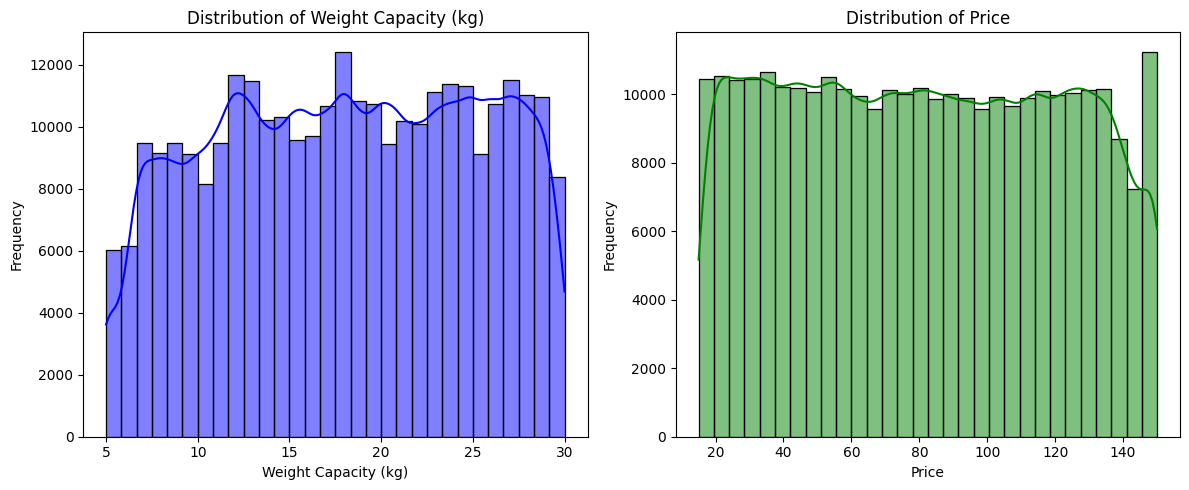

In [11]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(train['Weight Capacity (kg)'], kde=True, bins=30, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Weight Capacity (kg)')
axes[0].set_xlabel('Weight Capacity (kg)')
axes[0].set_ylabel('Frequency')

sns.histplot(train['Price'], kde=True, bins=30, color='green', ax=axes[1])
axes[1].set_title('Distribution of Price')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')

plt.show()

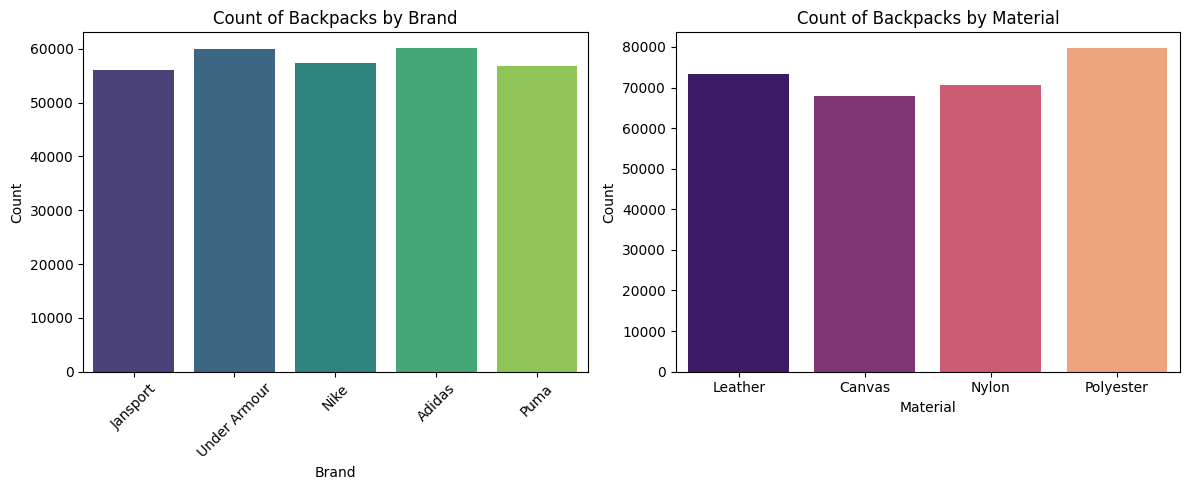

In [16]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=train, x='Brand', palette='viridis', ax=axes[0])
axes[0].set_title('Count of Backpacks by Brand')
axes[0].set_xlabel('Brand')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.countplot(data=train, x='Material', palette='magma', ax=axes[1])
axes[1].set_title('Count of Backpacks by Material')
axes[1].set_xlabel('Material')
axes[1].set_ylabel('Count')

plt.show()

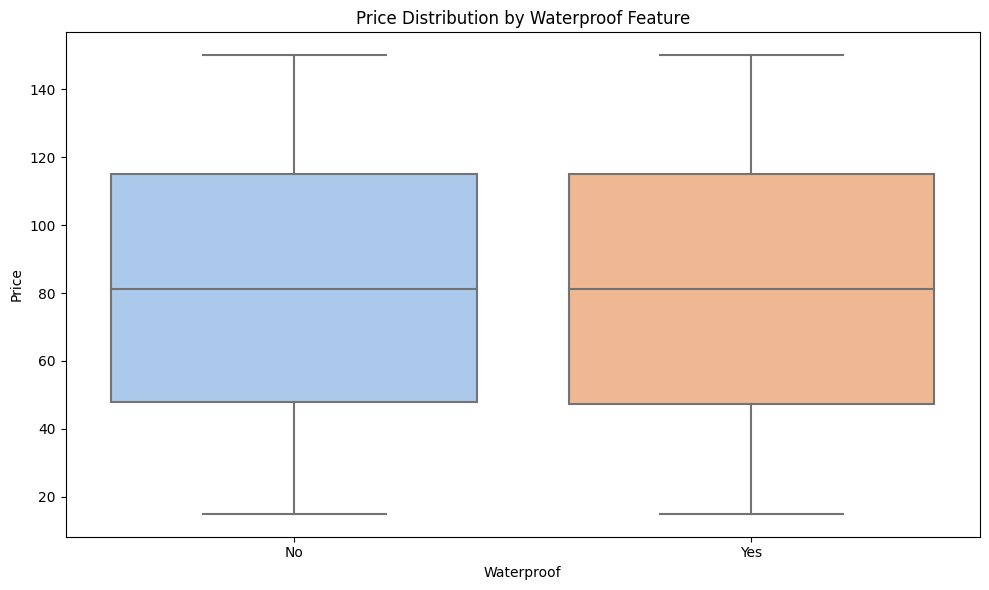

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='Waterproof', y='Price', palette='pastel')
plt.title('Price Distribution by Waterproof Feature')
plt.xlabel('Waterproof')
plt.ylabel('Price')
plt.show()

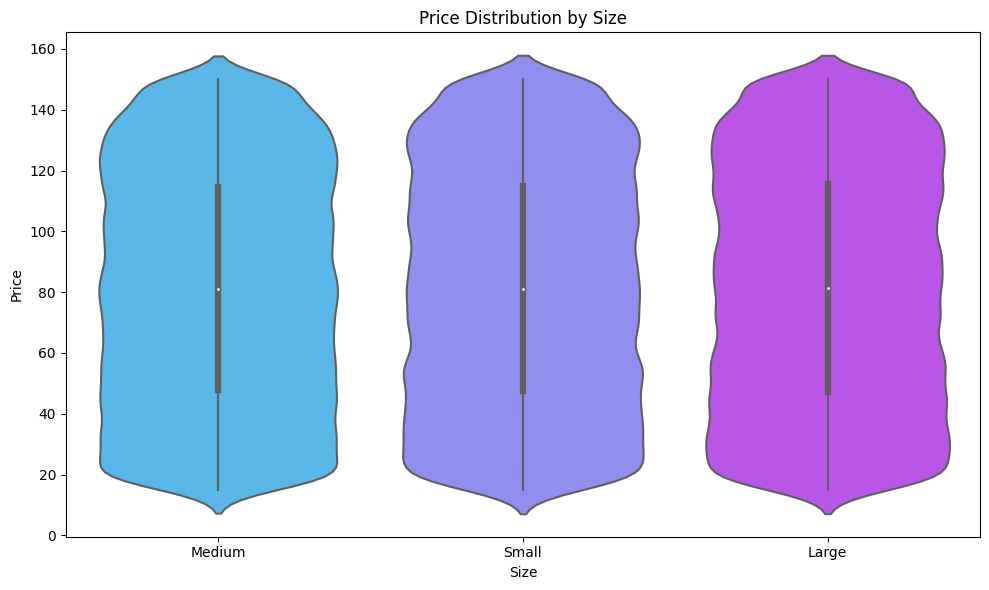

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=train, x='Size', y='Price', palette='cool')
plt.title('Price Distribution by Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

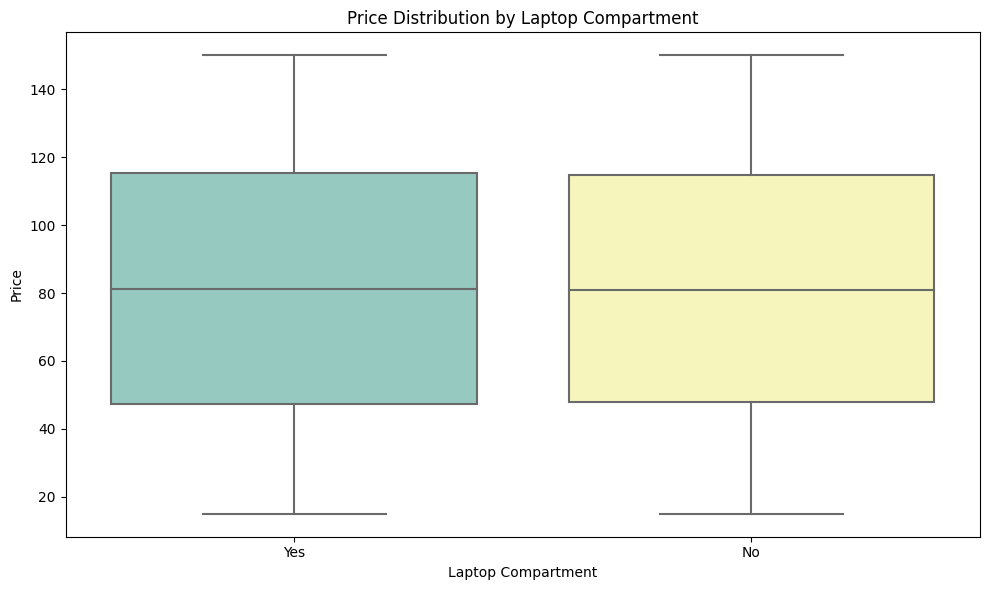

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='Laptop Compartment', y='Price', palette='Set3')
plt.title('Price Distribution by Laptop Compartment')
plt.xlabel('Laptop Compartment')
plt.ylabel('Price')
plt.show()

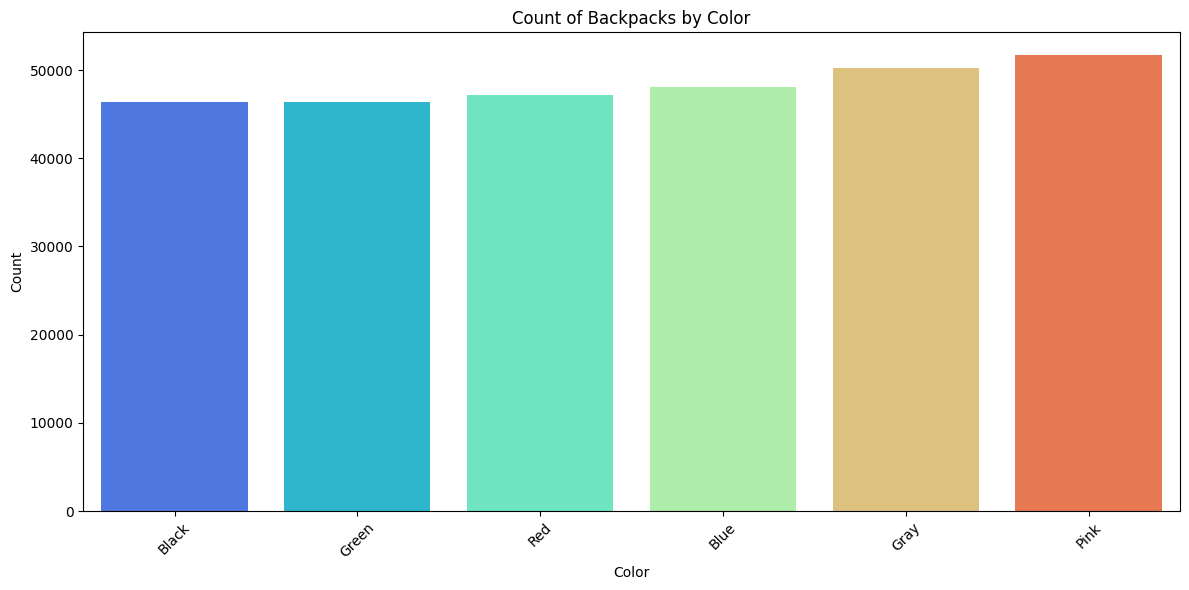

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='Color', palette='rainbow')
plt.title('Count of Backpacks by Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Data Processing

In [35]:
class DataProcessing:
    def __init__(self, train, test):
        """Initialize the class with train and test dataframes."""
        self.train_df = train.copy(deep=True)
        self.test_df = test.copy(deep=True)

        self.train_df.drop(columns=['id'], inplace=True, errors='ignore')
        self.test_df.drop(columns=['id'], inplace=True, errors='ignore')

    def numerical_imputer(self, df):
        """Impute missing values in numerical columns using KNNImputer."""
        numerical_columns = ['Weight Capacity (kg)']
        imputer = KNNImputer(n_neighbors=5)
        df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

    def categorical_imputer(self, df):
        """Impute missing values in categorical columns using mode (most frequent value)."""
        categorical_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
        imputer = SimpleImputer(strategy="most_frequent")
        df[categorical_columns] = imputer.fit_transform(df[categorical_columns])

    def encode_categorical(self, df):
        """Encode categorical features using Label Encoding."""
        categorical_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
        label_encoders = {}

        for col in categorical_columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col]) 
            label_encoders[col] = le
        
        return label_encoders  

    def process_data(self):
        """Apply imputations and encoding to both train and test datasets."""
        self.numerical_imputer(self.train_df)
        self.numerical_imputer(self.test_df)
        self.categorical_imputer(self.train_df)
        self.categorical_imputer(self.test_df)

        train_label_encoders = self.encode_categorical(self.train_df)
        test_label_encoders = self.encode_categorical(self.test_df)

        return self.train_df, self.test_df, train_label_encoders, test_label_encoders


data_processor = DataProcessing(train, test)
train_processed, test_processed, train_encoders, test_encoders = data_processor.process_data()

# Model Training

In [42]:
X = train_processed.drop(columns=['Price'])
y = train_processed['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
space = {
    'max_depth': hp.quniform("max_depth", 3, 18, 1),
    'gamma': hp.uniform('gamma', 1, 9),
    'reg_alpha': hp.quniform('reg_alpha', 40, 180, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight': hp.quniform('min_child_weight', 0, 10, 1),
    'n_estimators': 180,
    'seed': 0
}

def objective(space):
    clf = xgb.XGBRegressor(
        n_estimators=int(space['n_estimators']),
        max_depth=int(space['max_depth']),
        gamma=space['gamma'],
        reg_alpha=int(space['reg_alpha']),
        reg_lambda=space['reg_lambda'],
        min_child_weight=int(space['min_child_weight']),
        colsample_bytree=space['colsample_bytree'],
        objective='reg:squarederror',
        enable_categorical=True,
        eval_metric="rmse",
        early_stopping_rounds=10
    )

    clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    
    y_pred = clf.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"RMSE: {rmse:.4f}")
    return {'loss': rmse, 'status': STATUS_OK}

trials = Trials()
best_hyperparams = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

RMSE: 38.9213                                          
RMSE: 38.9231                                                                   
RMSE: 38.9213                                                                   
RMSE: 38.9983                                                                   
RMSE: 38.9177                                                                   
RMSE: 38.9201                                                                   
RMSE: 38.9472                                                                   
RMSE: 38.9152                                                                   
RMSE: 38.9432                                                                    
RMSE: 38.9358                                                                    
RMSE: 38.9240                                                                     
RMSE: 38.9415                                                                     
RMSE: 38.9389                                  

In [45]:
print("\nBest Hyperparameters:", best_hyperparams)


Best Hyperparameters: {'colsample_bytree': 0.5352306987669925, 'gamma': 4.516162159169303, 'max_depth': 4.0, 'min_child_weight': 6.0, 'reg_alpha': 157.0, 'reg_lambda': 0.8489669502335644}


In [47]:
best_params = {
    'n_estimators': 180,
    'max_depth': int(4),
    'gamma': 4.516162159169303,
    'reg_alpha': int(157),
    'reg_lambda': 0.8489669502335644,
    'min_child_weight': int(6),
    'colsample_bytree': 0.5352306987669925,
    'objective': 'reg:squarederror',
    'enable_categorical': True,
    'random_state': 42
}

model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(test_processed)

sub['Price'] = y_pred
sub.to_csv("submission.csv", index=False)

In [48]:
test_processed

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,3,1,2,2.0,0,0,2,3,20.671147
1,2,0,1,7.0,0,1,0,3,13.564105
2,0,0,0,9.0,0,1,1,1,11.809799
3,0,2,0,1.0,1,0,1,3,18.477036
4,0,2,0,2.0,1,1,2,0,9.907953
...,...,...,...,...,...,...,...,...,...
199995,0,0,0,2.0,1,0,1,5,7.383498
199996,2,3,2,9.0,0,1,1,4,6.058394
199997,1,2,2,9.0,0,1,2,3,26.890163
199998,3,2,0,10.0,1,0,2,2,25.769153
